# Практическое задание № 2. Нейронные сети


**Работу выполнила:**

Нечаева Анна Анатольевна, 312298

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Прогнозирование цены на жилье с помощью нейросетевой регрессионной модели

Необходимо по имеющимся данным о ценах на жильё предсказать окончательную цену каждого дома с учетом характеристик домов с использованием нейронной сети. Описание набора данных  содержит 80 классов (набор переменых) классификации оценки типа жилья, и находится в файле `data_description.txt`.

В работе требуется дополнить раздел «Моделирование» в подразделе «Построение и обучение модели» создать и инициализировать последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow. Скомпилировать нейронную сеть выбрав функцию потерь и оптимизатор соответственно. Оценить точность полученных результатов. Вывести предсказанные данные о продаже.


### Импорт библиотек
Импортируем необходимые библиотеки:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Считываем набор данных


Загрузим набор данных и присвоим следующими переменные:

* `train_data`: данные, используемые для обучения модели
* `test_data`: данные, используемые для проверки модели

In [ ]:
train_data = pd.read_csv('drive/MyDrive/AAI/lab_2_data/train.csv')
test_data = pd.read_csv('drive/MyDrive/AAI/lab_2_data/test.csv')

NameError: name 'pd' is not defined

## Подготовка данных
### Отобразим обучающие и проверочные данные:

In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Как можно видеть, `train_data` имеет на один столбец больше, чем `test_data`, это столбец `SalePrice`, для обучения модели перед применением ее для предсказания меток в test_data.

### Проверяем нет ли тестовые данные пустых значений значений (Nan)

Построим функцию `def missing_value_checker` для проверки и подсчёта пропущеных значений в test_data. А также выведем тип данных этих значений.


In [ ]:
def missing_value_checker(data):
    list = []
    for feature, content in data.items():
        if data[feature].isnull().values.any():

            sum = data[feature].isna().sum()

            type = data[feature].dtype

            print (f'{feature}: {sum}, type: {type}')

            list.append(feature)
    print(list)

    print(len(list))

missing_value_checker(test_data)

MSZoning: 4, type: object
LotFrontage: 227, type: float64
Alley: 1352, type: object
Utilities: 2, type: object
Exterior1st: 1, type: object
Exterior2nd: 1, type: object
MasVnrType: 894, type: object
MasVnrArea: 15, type: float64
BsmtQual: 44, type: object
BsmtCond: 45, type: object
BsmtExposure: 44, type: object
BsmtFinType1: 42, type: object
BsmtFinSF1: 1, type: float64
BsmtFinType2: 42, type: object
BsmtFinSF2: 1, type: float64
BsmtUnfSF: 1, type: float64
TotalBsmtSF: 1, type: float64
BsmtFullBath: 2, type: float64
BsmtHalfBath: 2, type: float64
KitchenQual: 1, type: object
Functional: 2, type: object
FireplaceQu: 730, type: object
GarageType: 76, type: object
GarageYrBlt: 78, type: float64
GarageFinish: 78, type: object
GarageCars: 1, type: float64
GarageArea: 1, type: float64
GarageQual: 78, type: object
GarageCond: 78, type: object
PoolQC: 1456, type: object
Fence: 1169, type: object
MiscFeature: 1408, type: object
SaleType: 1, type: object
['MSZoning', 'LotFrontage', 'Alley', 'Ut

Проверяем какие признаки в таблице можно оставить, а какие удалить. Если пропущенных значений слишком много, то удалим признак. Если их небольшое количество, то заполним `mean` или `median` для чисел, новая категория `missing` для строковых объектов.

В соответствии с этим:

– удалим ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'];

– заполним числовое отсутствующее значение значением `mean`;

– заполним строковое отсутствующее значение значением `missing`.

In [ ]:
test_edited = test_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)
train_edited = train_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)

def nan_filler(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            data[label] = content.fillna(content.median())
        else:
            data[label] = content.astype("category").cat.as_ordered()
            data[label] = pd.Categorical(content).codes+1

nan_filler(test_edited)
nan_filler(train_edited)

### Перепроверим наши данные:

In [ ]:
missing_value_checker(test_edited)

[]
0


In [ ]:
missing_value_checker(train_edited)

[]
0


In [ ]:
train_edited.shape, test_edited.shape

((1460, 76), (1459, 75))

In [ ]:
test_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int8   
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int8   
 6   LotShape       1459 non-null   int8   
 7   LandContour    1459 non-null   int8   
 8   Utilities      1459 non-null   int8   
 9   LotConfig      1459 non-null   int8   
 10  LandSlope      1459 non-null   int8   
 11  Neighborhood   1459 non-null   int8   
 12  Condition1     1459 non-null   int8   
 13  Condition2     1459 non-null   int8   
 14  BldgType       1459 non-null   int8   
 15  HouseStyle     1459 non-null   int8   
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [ ]:
train_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   LotShape       1460 non-null   int8   
 7   LandContour    1460 non-null   int8   
 8   Utilities      1460 non-null   int8   
 9   LotConfig      1460 non-null   int8   
 10  LandSlope      1460 non-null   int8   
 11  Neighborhood   1460 non-null   int8   
 12  Condition1     1460 non-null   int8   
 13  Condition2     1460 non-null   int8   
 14  BldgType       1460 non-null   int8   
 15  HouseStyle     1460 non-null   int8   
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Разделим данные

Поскольку мы не знаем метку (Цена) тестовых данных, для оценки модели, чтобы получить лучшую модель перед прогнозированием тестовых данных, разделим данные в файле train.scv на обучающие и проверочные данные, соотношение составляет 20%.

In [ ]:
X = train_edited.drop('SalePrice', axis=1)
y = train_edited['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape, test_edited.shape

((1168, 75), (1459, 75))

## Моделирование

### Построение и обучение модели


Создадим последовательную модель нейронной сети с помощью фрэймворка тренировки нейронных сетей *Tensorflow*.
***
*   *model_j_i* $-$ модели с $j$ слоями, но разными распределениями нейронов;

Так же для того, чтобы не случайным образом строить модели, а стремиться к наилучшим результатам, воспользуемся следующеми практическими правилами:

*   Количество скрытых нейронов должно быть между размером входного слоя и размером выходного слоя.
*   Количество скрытых нейронов должно составлять 2/3 размера входного слоя плюс размер выходного слоя.
*   Количество скрытых нейронов должно быть менее чем в два раза больше размера входного слоя.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers



model_3_120 = keras.Sequential([
        layers.Dense(120,input_dim = (75), activation="relu"),
        layers.Dense(81, activation="relu"),
        layers.Dense(1, name="layer3"),
    ])
tf.random.set_seed(40)

model_3_75 = keras.Sequential([
        layers.Dense(75,input_dim = (75), activation="relu"),
        layers.Dense(51, activation="relu"),
        layers.Dense(1, name="layer3"),
    ])
tf.random.set_seed(40)

model_3_45 = keras.Sequential([
        layers.Dense(45,input_dim = (75), activation="relu"),
        layers.Dense(31, activation="relu"),
        layers.Dense(1, name="layer3"),
    ])
tf.random.set_seed(40)


model_3_60 = keras.Sequential([
        layers.Dense(60,input_dim = (75), activation="relu"),
        layers.Dense(41, activation="relu"),
        layers.Dense(1, name="layer3"),
    ])
tf.random.set_seed(40)

model_3_45 = keras.Sequential([
        layers.Dense(45,input_dim = (75), activation="relu"),
        layers.Dense(31, activation="relu"),
        layers.Dense(1, name="layer3"),
    ])
tf.random.set_seed(40)


model_4_75 = keras.Sequential([
        layers.Dense(75,input_dim = (75), activation="relu"),
        layers.Dense(60, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, name="layer3"),
    ])
tf.random.set_seed(40)

model_4_60 = keras.Sequential([
        layers.Dense(60,input_dim = (75), activation="relu"),
        layers.Dense(51, activation="relu"),
        layers.Dense(12, activation="relu"),
        layers.Dense(1, name="layer3"),
    ])
tf.random.set_seed(40)

model_4_45 = keras.Sequential([
        layers.Dense(45,input_dim = (75), activation="relu"),
        layers.Dense(38, activation="relu"),
        layers.Dense(10, activation="relu"),
        layers.Dense(1, name="layer3"),
    ])
tf.random.set_seed(40)

model_4_45_c = keras.Sequential([
        layers.Dense(45,input_dim = (75), activation="relu"),
        layers.Dense(38, activation="relu"),
        layers.Dense(10, activation="relu"),
        layers.Dense(1, name="layer3"),
    ])
tf.random.set_seed(40)

model_4_45_cc = keras.Sequential([
        layers.Dense(45,input_dim = (75), activation="relu"),
        layers.Dense(38, activation="relu"),
        layers.Dense(10, activation="relu"),
        layers.Dense(1, name="layer3"),
    ])
tf.random.set_seed(40)


"\nmodel = models.Sequential()\n# замените None на колличество входных полносвязных слоёв, колличество нейронов, колличество выходов\ntf.random.set_seed(40)  #  Для обеспечения воспроизводимости результатов устанавливается функция seed\nmodel.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))\nmodel.add(layers.Dense(128, activation='relu'))\nmodel.add(layers.Dense(64, activation='relu'))\nmodel.add(layers.Dense(1, activation='relu'))\nprint(model.summary())\n\nmodel1 = models.Sequential()\n# замените None на колличество входных полносвязных слоёв, колличество нейронов, колличество выходов\ntf.random.set_seed(40)  #  Для обеспечения воспроизводимости результатов устанавливается функция seed\nmodel1.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))\nmodel1.add(layers.Dense(128, activation='relu'))\nmodel1.add(layers.Dense(64, activation='relu'))\nmodel1.add(layers.Dense(1, activation='relu'))\nprint(model1.summary())\n\nmodel2 = models.Seq

Скомпилируем наши нейронные сети, выбрав функцию потерь и оптимизатор соответственно.

In [ ]:

model_3_120.compile(optimizer='nadam', loss='mse', metrics=['mae'])
model_3_75.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_3_60.compile(optimizer='nadam', loss='mse', metrics=['mae'])
model_3_45.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_4_75.compile(optimizer='nadam', loss='mse', metrics=['mae'])
model_4_60.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_4_45.compile(optimizer='nadam', loss='mse', metrics=['mae'])

model_4_45_c.compile(optimizer='nadam', loss='mse', metrics=['mae'])
model_4_45_cc.compile(optimizer='nadam', loss='mse', metrics=['mae'])

Обучим модели на обучающих данных `X_train` и `y_train` задав гиперпараметры наших моделей нейронных сетей, например количество эпох (epochs), размер мини-выборки (batch_size).

In [ ]:
history_3_120 = model_3_120.fit(X_train, y_train,
                    epochs=100,
                    validation_split=0.1, #
                    verbose=2)

history_3_75 = model_3_75.fit(X_train, y_train,
                    epochs=50,
                    validation_split=0.1,
                    verbose=2)

history_3_60 = model_3_60.fit(X_train, y_train,
                    epochs=10,
                    validation_split=0.1,
                    verbose=2)

history_3_45 = model_3_45.fit(X_train, y_train,
                    epochs=10,
                    validation_split=0.1,
                    verbose=2)



history_4_75 = model_4_75.fit(X_train, y_train,
                    epochs=50,
                    validation_split=0.1,
                    verbose=2)
history_4_60 = model_4_60.fit(X_train, y_train,
                    epochs=10,
                    validation_split=0.1,
                    verbose=2)

history_4_45 = model_4_45.fit(X_train, y_train,
                    epochs=10,
                    validation_split=0.1,
                    verbose=2)

history_4_45_c = model_4_45_c.fit(X_train, y_train,
                    epochs=10,
                    validation_split=0.1,
                    verbose=2, batch_size = 100)

history_4_45_cc = model_4_45_cc.fit(X_train, y_train,
                    epochs=10,
                    validation_split=0.1,
                    verbose=2, batch_size = 50)


Epoch 1/100
33/33 - 2s - 69ms/step - loss: 34730872832.0000 - mae: 170373.3281 - val_loss: 30097543168.0000 - val_mae: 155960.7500
Epoch 2/100
33/33 - 0s - 5ms/step - loss: 19654791168.0000 - mae: 119115.8125 - val_loss: 9433757696.0000 - val_mae: 73156.1953
Epoch 3/100
33/33 - 0s - 9ms/step - loss: 7797950976.0000 - mae: 55097.6758 - val_loss: 5604818944.0000 - val_mae: 48580.7188
Epoch 4/100
33/33 - 0s - 9ms/step - loss: 6471209984.0000 - mae: 46854.9414 - val_loss: 5155851776.0000 - val_mae: 47097.6172
Epoch 5/100
33/33 - 0s - 9ms/step - loss: 5285947904.0000 - mae: 45076.5039 - val_loss: 4875870720.0000 - val_mae: 46376.0508
Epoch 6/100
33/33 - 0s - 5ms/step - loss: 4532070400.0000 - mae: 43844.3828 - val_loss: 4678899200.0000 - val_mae: 45736.5781
Epoch 7/100
33/33 - 0s - 9ms/step - loss: 4000544000.0000 - mae: 42727.7773 - val_loss: 4538133504.0000 - val_mae: 45270.2305
Epoch 8/100
33/33 - 0s - 9ms/step - loss: 3618481920.0000 - mae: 41667.4570 - val_loss: 4432016384.0000 - val_m

**Оцените полученные результаты**

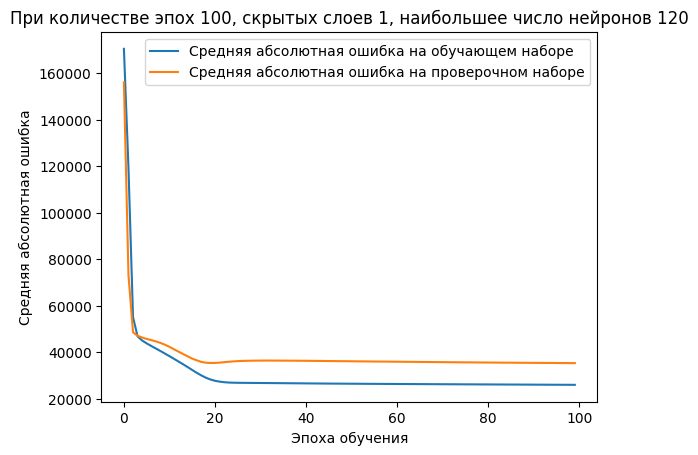

In [ ]:

plt.plot(history_3_120.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history_3_120.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.title('При количестве эпох 100, скрытых слоев 1, наибольшее число нейронов 120')
plt.legend()
plt.show()

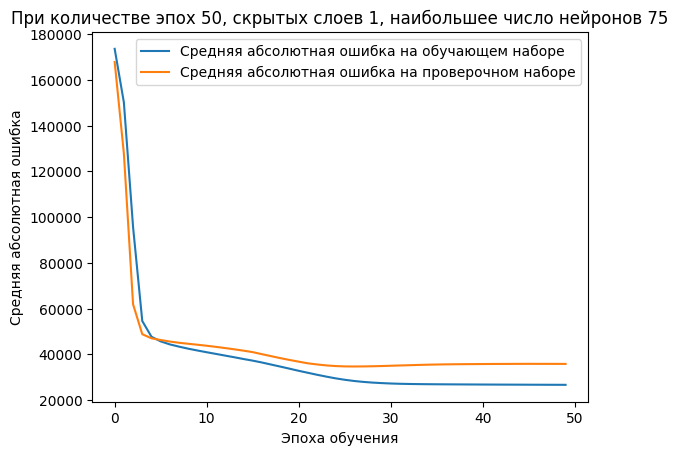

In [ ]:
plt.plot(history_3_75.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history_3_75.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.title('При количестве эпох 50, скрытых слоев 1, наибольшее число нейронов 75')
plt.legend()
plt.show()

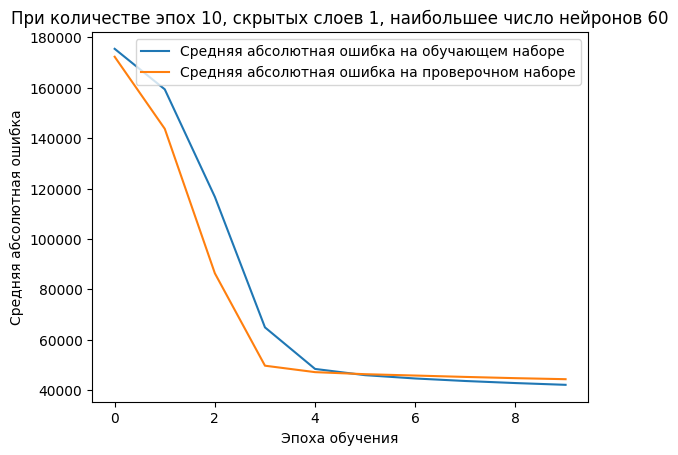

In [ ]:
plt.plot(history_3_60.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history_3_60.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.title('При количестве эпох 10, скрытых слоев 1, наибольшее число нейронов 60')
plt.legend()
plt.show()

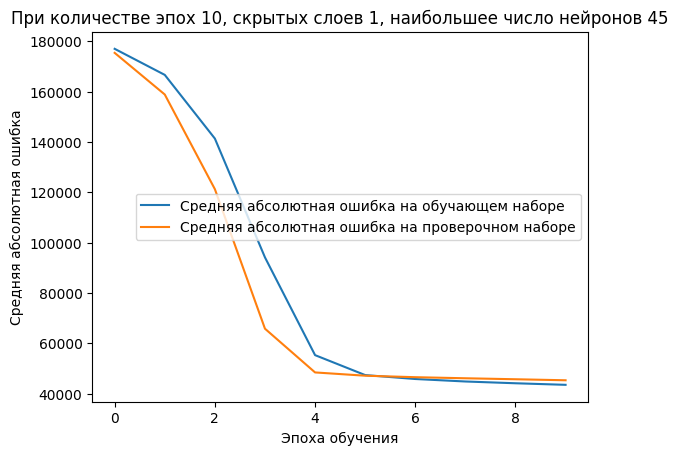

In [ ]:
plt.plot(history_3_45.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history_3_45.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.title('При количестве эпох 10, скрытых слоев 1, наибольшее число нейронов 45')
plt.legend()
plt.show()

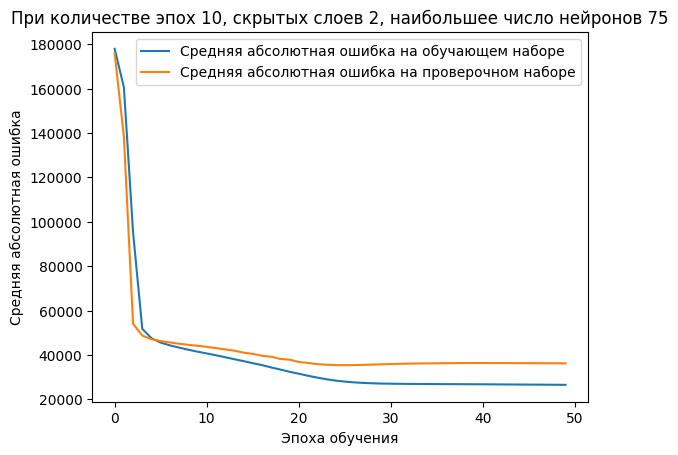

In [ ]:
plt.plot(history_4_75.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history_4_75.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.title('При количестве эпох 10, скрытых слоев 2, наибольшее число нейронов 75')
plt.legend()
plt.show()

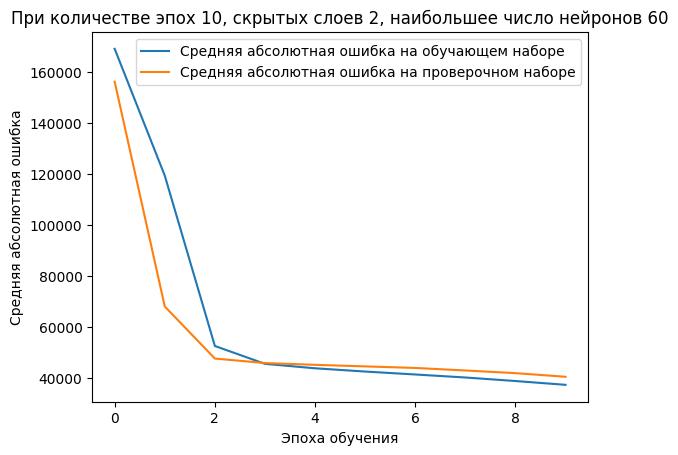

In [ ]:
plt.plot(history_4_60.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history_4_60.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.title('При количестве эпох 10, скрытых слоев 2, наибольшее число нейронов 60')
plt.legend()
plt.show()

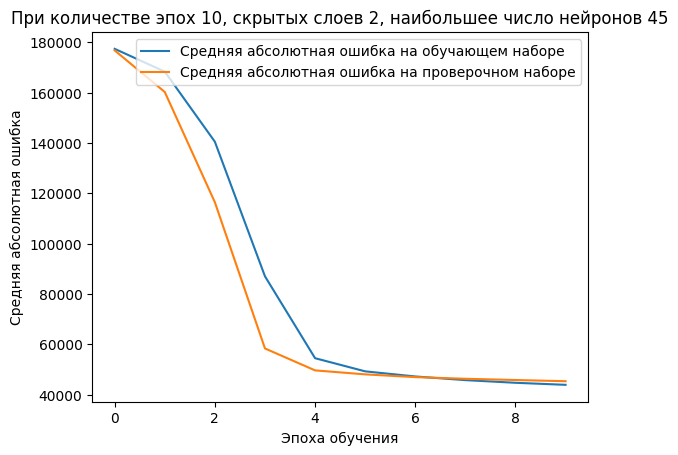

In [ ]:
plt.plot(history_4_45.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history_4_45.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.title('При количестве эпох 10, скрытых слоев 2, наибольшее число нейронов 45')
plt.legend()
plt.show()

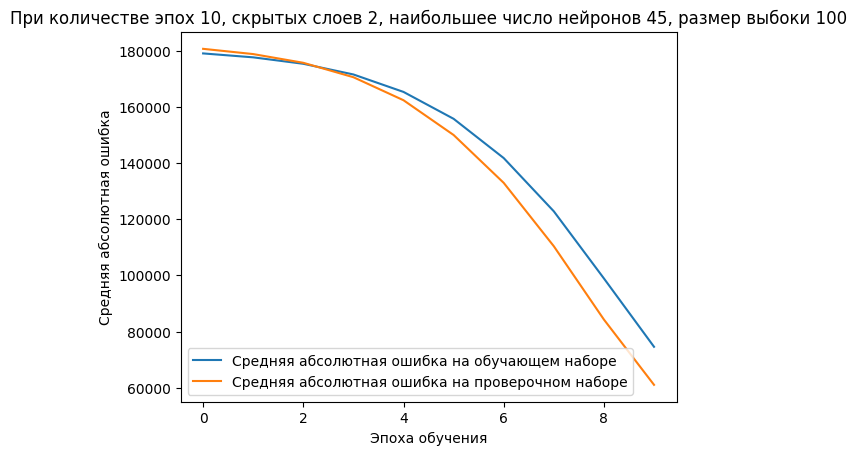

In [ ]:
plt.plot(history_4_45_c.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history_4_45_c.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.title('При количестве эпох 10, скрытых слоев 2, наибольшее число нейронов 45, размер выбоки 100')
plt.legend()
plt.show()

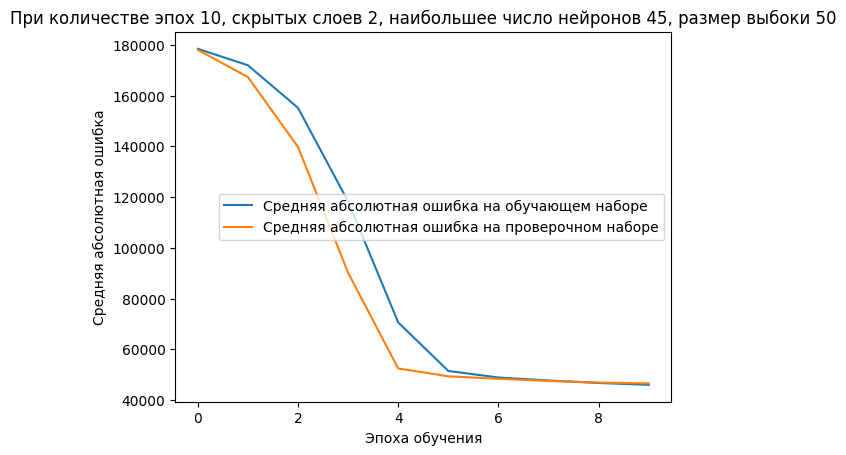

In [ ]:
plt.plot(history_4_45_cc.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history_4_45_cc.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.title('При количестве эпох 10, скрытых слоев 2, наибольшее число нейронов 45, размер выбоки 50')
plt.legend()
plt.show()

In [ ]:
scores_3_120 = model_3_120.evaluate(X_val, y_val, verbose=2)

scores_3_75 = model_3_75.evaluate(X_val, y_val, verbose=2)

scores_3_60 = model_3_60.evaluate(X_val, y_val, verbose=2)

scores_3_45 = model_3_45.evaluate(X_val, y_val, verbose=2)


scores_4_75 = model_4_75.evaluate(X_val, y_val, verbose=2)

scores_4_60 = model_4_60.evaluate(X_val, y_val, verbose=2)

scores_4_45 = model_4_45.evaluate(X_val, y_val, verbose=2)

scores_4_45_c = model_4_45_c.evaluate(X_val, y_val, verbose=2)

scores_4_45_cc = model_4_45_cc.evaluate(X_val, y_val, verbose=2)

10/10 - 0s - 5ms/step - loss: 1542121216.0000 - mae: 25581.1348
10/10 - 0s - 4ms/step - loss: 1557826176.0000 - mae: 25798.8262
10/10 - 0s - 5ms/step - loss: 4204775936.0000 - mae: 42015.5156
10/10 - 0s - 6ms/step - loss: 4463955968.0000 - mae: 43015.9805
10/10 - 0s - 4ms/step - loss: 1519298048.0000 - mae: 25506.8242
10/10 - 0s - 4ms/step - loss: 3258575360.0000 - mae: 37902.8477
10/10 - 0s - 5ms/step - loss: 4499329536.0000 - mae: 42966.0938
10/10 - 0s - 4ms/step - loss: 8600040448.0000 - mae: 61635.1797
10/10 - 0s - 5ms/step - loss: 4925989888.0000 - mae: 44555.6836


### Прогнозирование

In [ ]:
preds_3_120 = model_3_120.predict(test_edited)

preds_3_75 = model_3_75.predict(test_edited)

preds_3_60 = model_3_60.predict(test_edited)

preds_3_45 = model_3_45.predict(test_edited)

preds_4_75 = model_4_75.predict(test_edited)

preds_4_60 = model_4_60.predict(test_edited)

preds_4_45 = model_4_45.predict(test_edited)

preds_4_45_c = model_4_45_c.predict(test_edited)

preds_4_45_cc = model_4_45_cc.predict(test_edited)



46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
output = pd.DataFrame(
{
    'Id':test_edited['Id'],
    'SalePrice': np.squeeze(preds_3_120)
})
output



,Id,SalePrice
0,1461,156139.593750
1,1462,106442.804688
2,1463,200858.078125
3,1464,203076.609375
4,1465,173681.203125
...,...,...
1454,2915,75486.078125
1455,2916,99937.078125
1456,2917,210675.937500
1457,2918,92973.351562


In [ ]:
output = pd.DataFrame(
{
    'Id':test_edited['Id'],
    'SalePrice': np.squeeze(preds_3_75)
})
output

,Id,SalePrice
0,1461,145195.718750
1,1462,119807.414062
2,1463,198366.031250
3,1464,198909.234375
4,1465,171121.843750
...,...,...
1454,2915,80468.703125
1455,2916,100948.046875
1456,2917,205957.343750
1457,2918,99050.234375


In [ ]:
output = pd.DataFrame(
{
    'Id':test_edited['Id'],
    'SalePrice': np.squeeze(preds_3_60)
})
output

,Id,SalePrice
0,1461,172564.06250
1,1462,172441.28125
2,1463,198736.31250
3,1464,188021.46875
4,1465,166548.90625
...,...,...
1454,2915,140479.71875
1455,2916,144034.62500
1456,2917,227525.71875
1457,2918,173825.78125


In [ ]:
output = pd.DataFrame(
{
    'Id':test_edited['Id'],
    'SalePrice': np.squeeze(preds_3_45)
})
output

,Id,SalePrice
0,1461,174898.921875
1,1462,202608.781250
2,1463,198977.750000
3,1464,185795.625000
4,1465,164708.359375
...,...,...
1454,2915,141417.296875
1455,2916,144936.140625
1456,2917,234881.531250
1457,2918,178788.953125


In [ ]:
output = pd.DataFrame(
{
    'Id':test_edited['Id'],
    'SalePrice': np.squeeze(preds_4_75)
})
output

,Id,SalePrice
0,1461,145926.375000
1,1462,111007.375000
2,1463,197286.062500
3,1464,199487.000000
4,1465,172522.000000
...,...,...
1454,2915,81551.242188
1455,2916,101771.531250
1456,2917,204843.812500
1457,2918,98810.148438


In [ ]:
output = pd.DataFrame(
{
    'Id':test_edited['Id'],
    'SalePrice': np.squeeze(preds_4_60)
})
output

,Id,SalePrice
0,1461,165266.859375
1,1462,156633.718750
2,1463,196504.593750
3,1464,192584.218750
4,1465,177939.171875
...,...,...
1454,2915,135679.406250
1455,2916,142947.484375
1456,2917,211938.984375
1457,2918,156195.625000


In [ ]:
output = pd.DataFrame(
{
    'Id':test_edited['Id'],
    'SalePrice': np.squeeze(preds_4_45)
})
output

,Id,SalePrice
0,1461,174121.000000
1,1462,190161.781250
2,1463,197800.734375
3,1464,183370.218750
4,1465,161419.578125
...,...,...
1454,2915,134178.968750
1455,2916,136886.500000
1456,2917,234816.109375
1457,2918,175810.984375


In [ ]:
output = pd.DataFrame(
{
    'Id':test_edited['Id'],
    'SalePrice': np.squeeze(preds_4_45_c)
})
output

,Id,SalePrice
0,1461,135604.953125
1,1462,198673.046875
2,1463,156227.890625
3,1464,133345.250000
4,1465,101959.343750
...,...,...
1454,2915,79606.281250
1455,2916,80878.015625
1456,2917,201616.812500
1457,2918,136189.718750


In [ ]:
output = pd.DataFrame(
{
    'Id':test_edited['Id'],
    'SalePrice': np.squeeze(preds_4_45_cc)
})
output

,Id,SalePrice
0,1461,173475.984375
1,1462,226355.281250
2,1463,198000.328125
3,1464,179134.906250
4,1465,151397.046875
...,...,...
1454,2915,125041.000000
1455,2916,127026.875000
1456,2917,235986.234375
1457,2918,173432.171875


## Ответы на вопросы

### Влияние параметров на результат

### Про функции активации

**Функция активации** $-$ нелинейное преобразование, поэлементно применяющееся к пришедшим на вход данным.

Благодаря функциям активации нейронные сети способны порождать более информативные признаковые описания, преобразуя данные *нелинейным* образом. Может использоваться, например, *ReLU (rectified linear unit)* $$ReLU(x)=max(0, x)$$ или сигмоида $$\sigma(x) = \frac{1}{1+e^{-x}}$$

*Полносвязная нейронная сеть* или *многослойный перцептрон (MLP)* $-$ нейросеть, в которой есть только линейные слои и различные функции активации.

Функция активации идет после каждого линейного слоя. Линейная комбинация линейных отображений есть линейное отображение, то есть два последовательных линейных слоя эквивалентны одному линейному слою.


Добавление функции активации после линейного слоя позволяет получить нелинейное преобразование, и подобной проблемы уже не возникает. К тому же, правильный выбор функции активации позволяет получить преобразование, обладающее подходящими свойствами.


**ReLU, Rectified linear unit**
$$ReLU(x)=max(0, x),$$
$$ReLU : \mathbb{R} \to [0, +∞)$$

*ReLU* $-$ это простая кусочно-линейная функция. В нуле производная доопределяктся нулевым значением.

Плюсы:
*   простота вычисления активации и производной,
*   высокая скорость: прирост до 4-6 раз в сравнении с сигмоидой.

Минусы:
*   область значений является смещенной относительно нуля;
*   для отрицательных значений производная нулевая, что может вызвать затухание градиента.

### Отличие эпохи от итерации

Произошла одна **эпоха (epoch)** — весь датасет прошел через нейронную сеть в прямом и обратном направлении только один раз.

Так как одна эпоха слишком велика для используемой вычислительной мощности, датасет делят на маленькие партии — **батчи**.

Размер батча — это общее число тренировочных объектов, представленных в одном батче.

**Итерации** — число батчей, необходимых для завершения одной эпохи.

Отметим: число батчей равно числу итераций для одной эпохи.

Например, собираемся использовать 2000 тренировочных объектов.

Можно разделить полный датасет из 2000 объектов на батчи размером 500 объектов. Таким образом, для завершения одной эпохи потребуется 4 итерации.

### MSE и MAE

**MSE** (средняя квадратическая ошибка) — это оценка среднего значения квадрата ошибок, различие между предсказанием и фактическим значением. Эту метрику удобно использовать для выявления аномалий.

**MAE** (средняя абсолютная ошибка) — это оценка того, насколько близки предсказания к фактическим значениями. Эта метрика менее чувствительна к выбросам и может дать общее представление о качестве модели.

Простыми словами: если у нас сильные аномалии в значениях, то используем MAE; если аномалий мало, можно использовать MSE.

## Задание


В задние представлено логика выполнения с использование tensorflow/keras. Выполнять можно как с использованием tensorflow/keras, так и pytorch.


**При выполнении:**

Выведите отчет нейросетевой регрессионной модели, для  прогнозирование цены на жилье.


Подберите  разные комбинации гиперпараметров таким образом, чтобы получить лучший результат на тестовом наборе данных.

Попробуйте использовать разное количество нейронов на входном слое. Опишите достигнутый результат.

Добавьте в нейронную сеть скрытый слой с разным количеством нейронов.

Используйте разное количество эпох. Опишите достигнутый результат.

Используйте разные размеры мини-выборки (batch_size). Опишите достигнутый результат.

Попробуйте использовать разные значения оптимизатора `optimizers` и функции потерь `loss`. Сравните полученные результаты.

**Вопросы:**

Как выше перечисленные параметры влияют на полученный вами результат?

Что такое эпоха (Epoch)? В чем отличие от итерации (Iteration)?

Что такое функция активации? Какие вам известны? Как и зачем используются в нейронной сети?

Что такое MSE(Mean Squared Error) - Средняя квадратичная ошибка? Что такое MAE(Mean Absolute Error)? Для чего используются.